**texto en negrita**<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="" alt="Logo TECAZUAY" width="100%" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Lectura y escritura de Fichero de Datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>CICLO: M3A</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Verónica Chimbo <span style="margin-left: 30px;"></span></div>
        </div>
        <div style="text-align:right;">Carrera: TECNOLOGÍA SUPERIOR EN BIG DATA <span style="margin-left: 30px;"></span></div>
         <div style="text-align:right;">Estudiante: Victor Cabrera  <span style="margin-left: 30px;"></span></div>
          <div style="text-align:right;">Fecha: 10/06/2024  <span style="margin-left: 30px;"></span></div>
        </div>
    </div>
</div>
<!--/Header-->

# Introducción

La exporación, manipulación, visualización y análisis de datos empieza con la carga de los datos desde diferentes formatos de ficheros. En esta actividad veremos cómo leer ficheros de tipo `CSV`, `Excel`, `TXT`, `JSON` i `ZIP`, cargarlos en un `DataFrame` y volverlos a guardar en otro fichero.


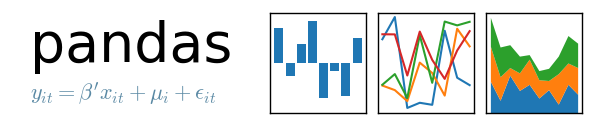
Usaremos un paquete de `Python` llamado `pandas`, que facilita la manipulación y el análisis de datos. `Pandas` incorpora estructuras de datos rápidas y flexibles diseñadas para trabajar de una manera intuitiva con datos relacionales o etiquetados.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lo primero que haremos será importar la librería `pandas`.

In [4]:
import pandas as pd

## Ficheros CSV

El acrónimo `CSV` corresponde a _Comma Separated Values_, es decir, ficheros separados por comas. De hecho, veremos que la función de `pandas` que usaremos para leer este tipo de ficheros también sirve para leer ficheros separados por otros caracteres, como los `TSV` o _Tab-Separated Values_, o los ficheros separados por punto y coma.

El fichero `CSV` que leeremos corresponde al dataset de la competición [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) de [Kaggle](https://www.kaggle.com/).

Para leer un fichero `CSV` usaremos la función [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) de `pandas`.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Actividad 2/data/titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Si el fichero no tiene cabecera, especificaremos el parámetro `header=None` y opcionalmente, el nombre de las columnas.

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Actividad 2/data/titanic_no_header.csv", header = None,
                 names = ["PassengerId", "Survived", "Pclass", "Name",
                          "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
                         ])
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Com podemos ver, el resultado es exactamente el mismo, y la única diferencia es que le hemos tenido que especificar explícitament el nombre de las columnas.

Si queremos leer un fichero que no está separado por comas, especificaremos el separador con el parámetro `sep`.

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Actividad 2/data/titanic.csv", sep='\t')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0  1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/...                             
1  2,1,1,"Cumings, Mrs. John Bradley (Florence Br...                             
2  3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,S...                             
3  4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May ...                             
4  5,0,3,"Allen, Mr. William Henry",male,35,0,0,3...

Para volverlo a guardar en otro fichero, por ejemplo separado por punto y coma, usaremos la función [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html) de `pandas`.

In [9]:
df.to_csv('/content/drive/MyDrive/Actividad 2/data/titanic_semicolon.csv', sep=';')

Si intentamos volver a cargar desde el fichero que hemos creado justo ahora, veremos que nos ha creado una columna `Unnamed`. Esto pasa porque por defecto nos guarda el índice del `DataFrame`.

In [10]:
pd.read_csv('/content/drive/MyDrive/Actividad 2/data/titanic_semicolon.csv', sep=';').head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

  PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked  
0  1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/...                               
1  2,1,1,"Cumings, Mrs. John Bradley (Florence Br...                               
2  3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,S...                               
3  4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May ...                               
4  5,0,3,"Allen, Mr. William Henry",male,35,0,0,3...

Para evitarlo, le explicitaremos que no quremos que nos guarde el índice mediante el parámetro `index=False`.

In [11]:
df.to_csv('/content/drive/MyDrive/Actividad 2/data/titanic_semicolon_no_index.csv', sep=';', index=False)

##  Ficheros Excel

Aún y ser un software propietario, `Excel` es una de las herramientas más populares y usadas en el tratamiento de datos. `Pandas` es capaz de leer los ficheros que genera este software en sus diferentes versiones.

El fichero `Excel` que leeremos corresponde al dataset de la competición [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) de [Kaggle](https://www.kaggle.com/). Este `Excel` tiene tres `sheets` que corresponden a las películas de los años `1900s`, `2000s` i `2010s`.

Para leer un fichero `Excel` usaremos la función [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) de `pandas`.

In [12]:
xls_file = pd.read_excel('/content/drive/MyDrive/Actividad 2/data/movies.xls')
xls_file.head()

Title  Year  \
0  Intolerance: Love's Struggle Throughout the Ages   1916   
1                    Over the Hill to the Poorhouse   1920   
2                                    The Big Parade   1925   
3                                        Metropolis   1927   
4                                     Pandora's Box   1929   

                Genres Language  Country Content Rating  Duration  \
0    Drama|History|War      NaN      USA      Not Rated       123   
1          Crime|Drama      NaN      USA            NaN       110   
2    Drama|Romance|War      NaN      USA      Not Rated       151   
3         Drama|Sci-Fi   German  Germany      Not Rated       145   
4  Crime|Drama|Romance   German  Germany      Not Rated       110   

   Aspect Ratio     Budget  Gross Earnings  ... Facebook Likes - Actor 1  \
0          1.33   385907.0             NaN  ...                      436   
1          1.33   100000.0       3000000.0  ...                        2   
2          1.33   245000.0             NaN  ...                       81   
3          1.33  6000000.0         26435.0  ...                      136   
4          1.33        NaN          9950.0  ...                      426   

  Facebook Likes - Actor 2 Facebook Likes - Actor 3  \
0                       22                      9.0   
1                        2                      0.0   
2                       12                      6.0   
3                       23                     18.0   
4                       20                      3.0   

  Facebook Likes - cast Total  Facebook likes - Movie  Facenumber in posters  \
0                         481                     691                      1   
1                           4                       0                      1   
2                         108                     226                      0   
3                         203                   12000                      1   
4                         455                     926                      1   

   User Votes  Reviews by Users  Reviews by Crtiics  IMDB Score  
0       10718                88                69.0         8.0  
1           5                 1                 1.0         4.8  
2        4849                45                48.0         8.3  
3      111841               413               260.0         8.3  
4        7431                84                71.0         8.0  

[5 rows x 25 columns]

Nuestro `Excel` tiene tres `sheets`. Si no le decimos nada, por defecto la función [`read_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html) nos carga el primero. Si queremos especificar otro, lo podemos hacer por el nombre mediante el parámetro `sheet_name`.

In [13]:
xls_file = pd.read_excel('/content/drive/MyDrive/Actividad 2/data/movies.xls', sheet_name='2010s')
xls_file.head()

Title    Year  \
0                            127 Hours   2010.0   
1                          3 Backyards   2010.0   
2                                    3   2010.0   
3            8: The Mormon Proposition   2010.0   
4  A Turtle's Tale: Sammy's Adventures   2010.0   

                               Genres Language  Country Content Rating  \
0  Adventure|Biography|Drama|Thriller  English      USA              R   
1                               Drama  English      USA              R   
2                Comedy|Drama|Romance   German  Germany        Unrated   
3                         Documentary  English      USA              R   
4          Adventure|Animation|Family  English   France             PG   

   Duration  Aspect Ratio      Budget  Gross Earnings  ...  \
0      94.0          1.85  18000000.0      18329466.0  ...   
1      88.0           NaN    300000.0             NaN  ...   
2     119.0          2.35         NaN         59774.0  ...   
3      80.0          1.78   2500000.0         99851.0  ...   
4      88.0          2.35         NaN             NaN  ...   

  Facebook Likes - Actor 1 Facebook Likes - Actor 2 Facebook Likes - Actor 3  \
0                  11000.0                    642.0                    223.0   
1                    795.0                    659.0                    301.0   
2                     24.0                     20.0                      9.0   
3                    191.0                     12.0                      5.0   
4                    783.0                    749.0                    602.0   

  Facebook Likes - cast Total  Facebook likes - Movie  Facenumber in posters  \
0                       11984                   63000                    0.0   
1                        1884                      92                    0.0   
2                          69                    2000                    0.0   
3                         210                       0                    0.0   
4                        3874                       0                    2.0   

   User Votes  Reviews by Users  Reviews by Crtiics  IMDB Score  
0      279179             440.0               450.0         7.6  
1         554              23.0                20.0         5.2  
2        4212              18.0                76.0         6.8  
3        1138              30.0                28.0         7.1  
4        5385              22.0                56.0         6.1  

[5 rows x 25 columns]

Para volverlo a guardar en otro fichero `Excel` usaremos la función  [`to_excel`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html) de `pandas`.

In [14]:
xls_file.to_excel('movies_2010.xlsx', index=False)

## Ficheros TXT

A veces los ficheros de datos no estan separados por ningún caracter en concreto, sino que cada campo tiene una medida fija. Estos tipos de ficheros se llaman _Fixed Width Format_, o de campos de ancho fija. La función [`read_fwf`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html) de `pandas` nos permite tratar con estos ficheros. Si no especificamos el ancho de los campos, intentará inferir la estructura del fichero.

Los datos que usaremos son los [_ratings_](https://ratings.fide.com/download.phtml) de los jugadores de la Federación Internacional de Ajedrez.

In [15]:
df = pd.read_fwf('/content/drive/MyDrive/Actividad 2/data/players_list_foa.txt')
df.head()

ID Number                       Name  Fed Sex  Tit WTit OTit  FOA   SRtng  \
0   10224084  A B M Hasibuzzaman, Tapan  BAN   M  NaN  NaN  NaN  NaN     NaN   
1   35077023             A Chakravarthy  IND   M  NaN  NaN  NaN  NaN  1151.0   
2   10207538           A E M, Doshtagir  BAN   M  NaN  NaN  NaN  NaN  1840.0   
3    5716365            A Hamid, Harman  MAS   M  NaN  NaN   NI  NaN     NaN   
4   10207546        A K M Aminul, Islam  BAN   M  NaN  NaN  NaN  NaN     NaN   

   SGm    SK   RRtng  RGm    Rk   BRtng  BGm    BK  B-day Flag  
0  NaN   NaN     NaN  NaN   NaN     NaN  NaN   NaN   1977  NaN  
1  0.0  40.0     NaN  NaN   NaN     NaN  NaN   NaN   1986    i  
2  0.0  40.0  1836.0  0.0  20.0  1860.0  0.0  20.0   1974    i  
3  NaN   NaN  1593.0  0.0  20.0     NaN  NaN   NaN      0  NaN  
4  NaN   NaN     NaN  NaN   NaN     NaN  NaN   NaN      0  NaN

## Ficheros JSON

`JSON`, acrónimo de _JavaScript Object Notation_, es un formato estándard de transferencia de datos que utiliza una sintaxi legible para los humanos y que consiste en listas anidadas de pares clave/valor. Por [ejemplo](http://json.org/example.html), aquí podemos ver un registro de una base de datos no relacional en formato JSON:

```json
{
  "menu": {
    "id": "file",
    "value": "File",
    "popup": {
      "menuitem": [
        {"value": "New", "onclick": "CreateNewDoc()"},
        {"value": "Open", "onclick": "OpenDoc()"},
        {"value": "Close", "onclick": "CloseDoc()"}
      ]
    }
  }
}
```

Como podemos ver, los datos no están estructurados en formato tabla. Cuando carguemos el `JSON` a un `DataFrame` con `pandas`, cada columna corresponderá a una de las claves de primer nivel de cada registro. Y su valor será, en el caso de listas anidadas, una lista en formato `JSON`.

Los datos que usaremos corresponden a los últimos 15 `issues` del paquete `pandas` publicados en [`Github`](https://api.github.com/repositories/858127/issues?per_page=15). Vemos que `pandas` también nos permite leer el fichero a través de su `URL`.

In [17]:
df = pd.read_json('https://api.github.com/repositories/858127/issues?per_page=15')
df = pd.read_json('/content/drive/MyDrive/Actividad 2/data/pandas_issues.json')
df.head()

url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                   repository_url  \
0  https://api.github.com/repos/pandas-dev/pandas   
1  https://api.github.com/repos/pandas-dev/pandas   
2  https://api.github.com/repos/pandas-dev/pandas   
3  https://api.github.com/repos/pandas-dev/pandas   
4  https://api.github.com/repos/pandas-dev/pandas   

                                          labels_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                        comments_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                          events_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                            html_url         id  number  \
0    https://github.com/pandas-dev/pandas/pull/20015  302742972   20015   
1  https://github.com/pandas-dev/pandas/issues/20014  302667311   20014   
2  https://github.com/pandas-dev/pandas/issues/20012  302662325   20012   
3  https://github.com/pandas-dev/pandas/issues/20011  302656554   20011   
4  https://github.com/pandas-dev/pandas/issues/20008  302516428   20008   

                                               title  \
0  DOC: enable matplotlib plot_directive to inclu...   
1  CLN: followons to refactor of series/test_inde...   
2  Center rolling window with date NotImplemented...   
3                 WARN: numpy warnings on operations   
4  to_latex shifts column names if MultiIndex con...   

                                                user  ... assignee assignees  \
0  {'login': 'jorisvandenbossche', 'id': 1020496,...  ...      NaN        []   
1  {'login': 'jreback', 'id': 953992, 'avatar_url...  ...      NaN        []   
2  {'login': 'weber-s', 'id': 25247745, 'avatar_u...  ...      NaN        []   
3  {'login': 'jreback', 'id': 953992, 'avatar_url...  ...      NaN        []   
4  {'login': 'toobaz', 'id': 1224492, 'avatar_url...  ...      NaN        []   

                                           milestone  comments  \
0                                               None         0   
1  {'url': 'https://api.github.com/repos/pandas-d...         1   
2                                               None         0   
3  {'url': 'https://api.github.com/repos/pandas-d...         0   
4                                               None         0   

                 created_at                updated_at  closed_at  \
0 2018-03-06 15:20:53+00:00 2018-03-06 15:21:59+00:00        NaT   
1 2018-03-06 11:40:05+00:00 2018-03-06 12:14:41+00:00        NaT   
2 2018-03-06 11:22:54+00:00 2018-03-06 11:22:54+00:00        NaT   
3 2018-03-06 11:03:58+00:00 2018-03-06 11:06:37+00:00        NaT   
4 2018-03-06 00:24:20+00:00 2018-03-06 08:23:49+00:00        NaT   

  author_association                                       pull_request  \
0              OWNER  {'url': 'https://api.github.com/repos/pandas-d...   
1        CONTRIBUTOR                                                NaN   
2               NONE                                                NaN   
3      

En el `DataFrame` anterior vemos que hay campos, `milestone`, `pull_request` o `user`, que tienen como valor un otro `JSON`. Hay una manera de aplanar la estructura de un `JSON` para adaptarla en formato `DataFrame`, y es a través de la función [`json_normalize`](http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.io.json.json_normalize.html).

In [19]:
import json
from pandas import json_normalize

with open('/content/drive/MyDrive/Actividad 2/data/pandas_issues.json') as f:
    issues = json.load(f)

df = json_normalize(issues)
df.head()

url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                   repository_url  \
0  https://api.github.com/repos/pandas-dev/pandas   
1  https://api.github.com/repos/pandas-dev/pandas   
2  https://api.github.com/repos/pandas-dev/pandas   
3  https://api.github.com/repos/pandas-dev/pandas   
4  https://api.github.com/repos/pandas-dev/pandas   

                                          labels_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                        comments_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                          events_url  \
0  https://api.github.com/repos/pandas-dev/pandas...   
1  https://api.github.com/repos/pandas-dev/pandas...   
2  https://api.github.com/repos/pandas-dev/pandas...   
3  https://api.github.com/repos/pandas-dev/pandas...   
4  https://api.github.com/repos/pandas-dev/pandas...   

                                            html_url         id  number  \
0    https://github.com/pandas-dev/pandas/pull/20015  302742972   20015   
1  https://github.com/pandas-dev/pandas/issues/20014  302667311   20014   
2  https://github.com/pandas-dev/pandas/issues/20012  302662325   20012   
3  https://github.com/pandas-dev/pandas/issues/20011  302656554   20011   
4  https://github.com/pandas-dev/pandas/issues/20008  302516428   20008   

                                               title  \
0  DOC: enable matplotlib plot_directive to inclu...   
1  CLN: followons to refactor of series/test_inde...   
2  Center rolling window with date NotImplemented...   
3                 WARN: numpy warnings on operations   
4  to_latex shifts column names if MultiIndex con...   

                                              labels  ...  \
0                                                 []  ...   
1  [{'id': 211029535, 'url': 'https://api.github....  ...   
2                                                 []  ...   
3  [{'id': 76865106, 'url': 'https://api.github.c...  ...   
4                                                 []  ...   

               milestone.creator.received_events_url  milestone.creator.type  \
0                                                NaN                     NaN   
1  https://api.github.com/users/jreback/received_...                    User   
2                                                NaN                     NaN   
3  https://api.github.com/users/jreback/received_...                    User   
4                                                NaN                     NaN   

  milestone.creator.site_admin milestone.open_issues  milestone.closed_issues  \
0                          NaN                   NaN                      NaN   
1                        False                 134.0                   1076.0   
2                          NaN                   NaN                      NaN   
3                        False                 134.0                   1076.0   
4                          NaN                   NaN                      NaN   

   milestone.state  milestone.created_at  milestone.updated_at  \
0              NaN                   NaN                   NaN   
1             open  2017-10-20T10:17:09Z  2018-03-06T13:32:20Z   
2              NaN                   NaN                   Na

Vemos que ahora los campos ya no contienen listas de valores. Y es que el campo `user`, por ejemplo, se nos ha convertido en los camps `user.id`, `user.login`, `user.organizations_url`, `user.received_events_url`, `user.repos_url`, `user.site_admin`, `user.starred_url`, `user.subscriptions_url`, `user.type` y `user.url`.

Finalmente, para guardar el nuevo `DataFrame` aplanado en un fichero `JSON` usaremos la funció  [`to_json`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html) de `pandas`.

In [20]:
df.to_json('pandas_issues_flattened.json')

## Ficheros zip

Cualquier de los formatos anteriores los podemos encontar comprimidos. Podemos descomprimir el fichero y después leerlo.

In [21]:
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/Actividad 2/data/titanic.zip')
df = pd.read_csv(zf.open('titanic.csv'))
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Pero también podemos hacerlo todo en un solo paso sin tenerlo que descomprimir antes, con el parámetro `compression`.

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Actividad 2/data/titanic.zip', compression='zip')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**CONCLUSIONES**

La capacidad de leer diferentes tipos de archivos de datos, como CSV, XLS, TXT, JSON y ZIP, en Python ofrece una versatilidad invaluable para el análisis y procesamiento de información. Al aprovechar las bibliotecas y herramientas disponibles en Python, como Pandas, openpyxl, json, y zipfile, los usuarios pueden acceder a una amplia gama de datos y realizar diversas operaciones sobre ellos.

**La lectura de archivos CSV** proporciona una forma eficiente de trabajar con datos tabulares, comúnmente utilizados en análisis de datos y ciencia de datos.

**Los archivos XLS**, aunque menos comunes en comparación con CSV, siguen siendo relevantes, especialmente cuando se trata de datos almacenados en hojas de cálculo de Excel.

**Los archivos TXT**, aunque simples en estructura, son útiles para datos sin formato o para formatos personalizados que pueden ser procesados de manera programática.

**El formato JSON **es ampliamente utilizado en el intercambio de datos debido a su estructura flexible y legible para humanos, lo que lo hace ideal para la comunicación entre aplicaciones web y el almacenamiento de datos semi-estructurados. Además, la capacidad de leer archivos ZIP en Python es esencial para trabajar con conjuntos de datos comprimidos, lo que facilita el manejo de grandes volúmenes de datos de manera más eficiente.

**En conclusión**, la capacidad de leer archivos de datos en varios formatos en Python amplía significativamente las posibilidades de análisis, procesamiento y manipulación de datos, lo que permite a los usuarios acceder y trabajar con una amplia variedad de conjuntos de datos de manera eficiente y efectiva.